<a href="https://colab.research.google.com/github/jkm2000korea/master_degree/blob/main/10%EC%A3%BC%EC%B0%A8_Decision_Tree_20240508_(%EC%98%A4%EB%A5%98%EB%A6%AC%EB%B7%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/데이터마이닝_2024/예제 데이터')
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv('RidingMowers.csv')
df1

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


[Text(0.5, 0.75, 'Income <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = Nonowner'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Nonowner'),
 Text(0.75, 0.25, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Owner')]

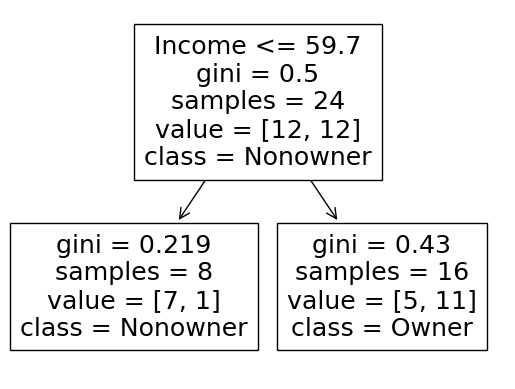

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=7, max_depth=1)
tree.fit(df1.drop(columns=['Ownership']), df1['Ownership'])
plot_tree(tree, class_names=tree.classes_, feature_names=df1.columns[:2])

[Text(0.5, 0.8333333333333334, 'Income <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = Nonowner'),
 Text(0.25, 0.5, 'Lot_Size <= 21.4\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Nonowner'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Nonowner'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Owner'),
 Text(0.75, 0.5, 'Lot_Size <= 19.8\ngini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Owner'),
 Text(0.625, 0.16666666666666666, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Nonowner'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Owner')]

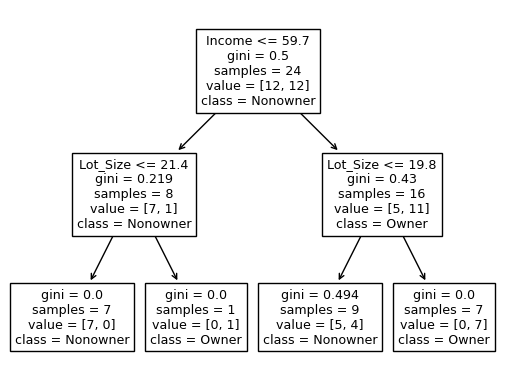

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=7, max_depth=2)
tree.fit(df1.drop(columns=['Ownership']), df1['Ownership'])
plot_tree(tree, class_names=tree.classes_, feature_names=df1.columns[:2])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df2 = pd.read_csv('UniversalBank.csv')
df2.drop(columns=['ID', 'ZIP Code'], inplace=True)
df2

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


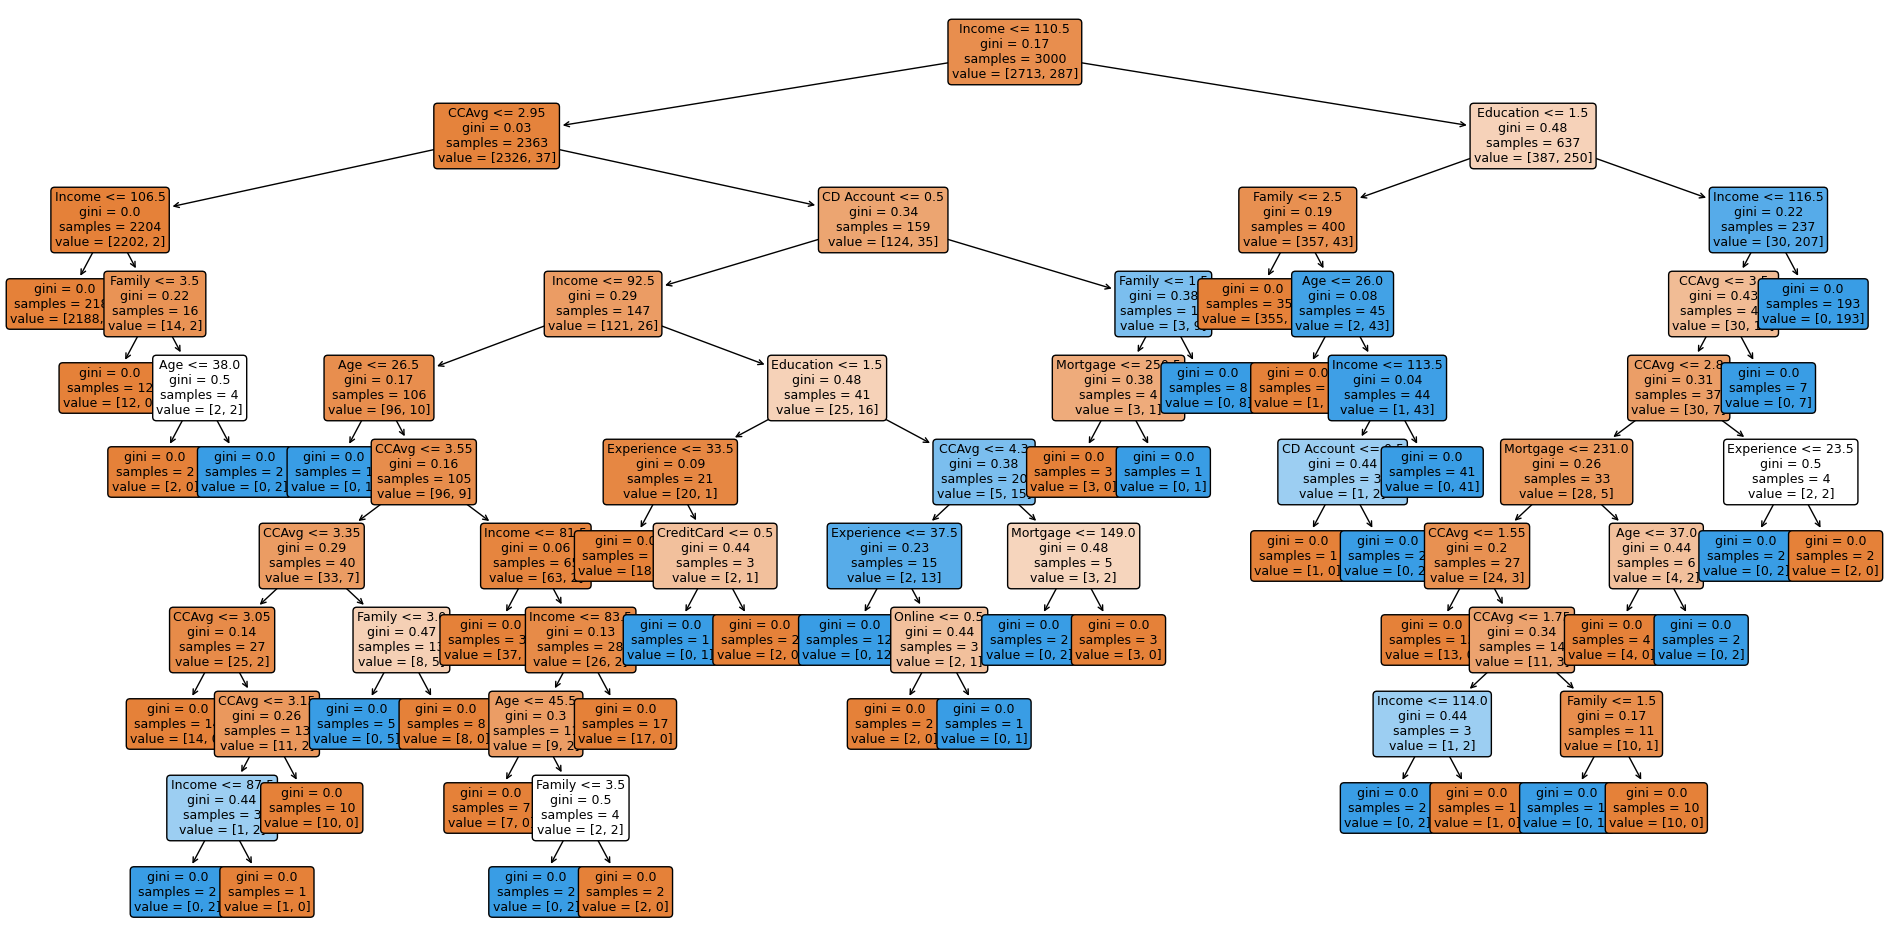

In [8]:
X = df2.drop(columns=['Personal Loan'])
Y = df2['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)

fulltree = DecisionTreeClassifier(random_state=1)
fulltree.fit(train_X, train_y)

plt.figure(figsize=(24,12))
plot_tree(fulltree,
          feature_names=train_X.columns,
          filled=True,
          fontsize=9,  # Larger font size
          proportion=False,
          rounded=True,  # Rounded corners for nodes
          precision=2)  # Less precision in numerical outputs to save space
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train_preds = fulltree.predict(train_X)

train_conf_matrix = confusion_matrix(train_y, train_preds)
train_conf_df = pd.DataFrame(train_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Training Confusion Matrix:\n", train_conf_df)

train_accuracy = accuracy_score(train_y, train_preds)
print("validation Accuracy:", train_accuracy)

Training Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                2711                   2
Actual Positive                  51                 236
validation Accuracy: 0.9823333333333333


In [20]:
from sklearn.model_selection import train_test_split

# Read the data from the CSV file
df2 = pd.read_csv('UniversalBank.csv')

# Drop unnecessary columns
# df2.drop(columns=['ID', 'ZIP Code'], inplace=True)

# Split the data into train and test sets
train_df, test_df = train_test_split(df2, test_size=0.2, random_state=1)

# Save the test set to a new CSV file
test_df.to_csv('UniversalBank(test).csv', index=False)

In [21]:
df3 = pd.read_csv('UniversalBank(test).csv')
valid_X = df3.drop(columns=['Personal Loan','ID', 'ZIP Code'])
valid_y = df3['Personal Loan']

valid_preds = fulltree.predict(valid_X)

valid_conf_matrix = confusion_matrix(valid_y, valid_preds)
valid_conf_df = pd.DataFrame(valid_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Validation Confusion Matrix:\n", valid_conf_df)

valid_accuracy = accuracy_score(valid_y, valid_preds)
print("validation Accuracy:", valid_accuracy)

Validation Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 897                   3
Actual Positive                  23                  77
validation Accuracy: 0.974


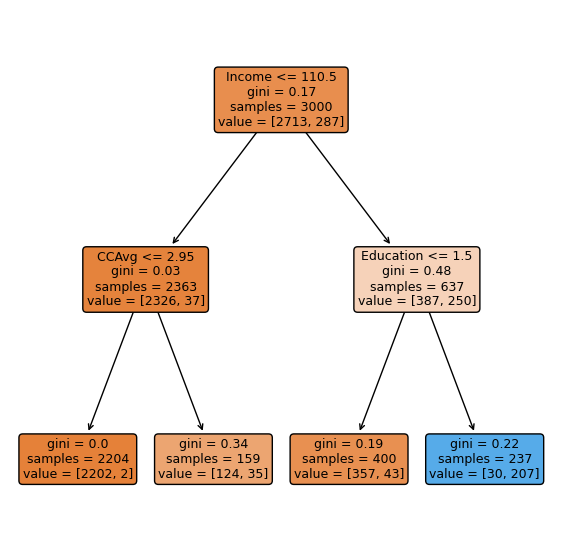

In [22]:
X = df2.drop(columns=['Personal Loan'])
Y = df2['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)

fulltree = DecisionTreeClassifier(random_state=1, max_depth=2)
fulltree.fit(train_X, train_y)

plt.figure(figsize=(7,7))
plot_tree(fulltree,
          feature_names=train_X.columns,
          filled=True,
          fontsize=9,  # Larger font size
          proportion=False,
          rounded=True,  # Rounded corners for nodes
          precision=2)  # Less precision in numerical outputs to save space
plt.show()

In [23]:
train_preds = fulltree.predict(train_X)

train_conf_matrix = confusion_matrix(train_y, train_preds)
train_conf_df = pd.DataFrame(train_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Training Confusion Matrix:\n", train_conf_df)

train_accuracy = accuracy_score(train_y, train_preds)
print("validation Accuracy:", train_accuracy)

Training Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                2683                  30
Actual Positive                  80                 207
validation Accuracy: 0.9633333333333334


In [27]:
df3 = pd.read_csv('UniversalBank.csv')
df3

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [29]:
# df3 = pd.read_csv('AdjustedSyntheticUniversalBank.csv')
df3 = pd.read_csv('UniversalBank.csv')

# valid_X = df3.drop(columns=['Personal Loan','ID', 'ZIP Code'])
valid_X = df3.drop(columns=['Personal Loan'])

valid_y = df3['Personal Loan']

valid_preds = fulltree.predict(valid_X)

valid_conf_matrix = confusion_matrix(valid_y, valid_preds)
valid_conf_df = pd.DataFrame(valid_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Validation Confusion Matrix:\n", valid_conf_df)

valid_accuracy = accuracy_score(valid_y, valid_preds)
print("validation Accuracy:", valid_accuracy)

Validation Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                4477                  43
Actual Positive                 141                 339
validation Accuracy: 0.9632


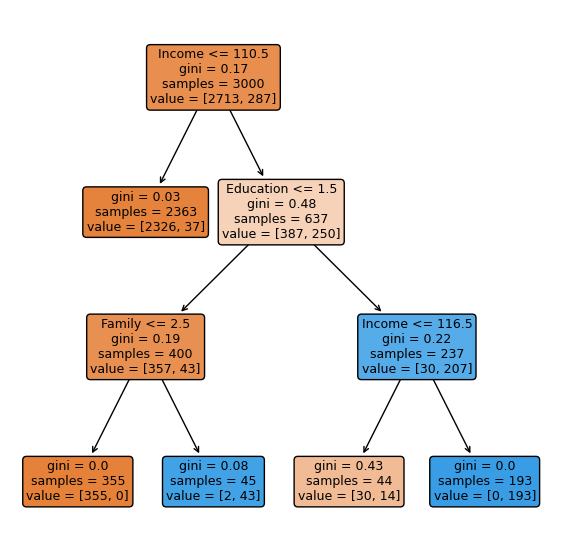

In [30]:
#min_impurity_decrease 기준으로 노드 분기 정도 선택

X = df2.drop(columns=['Personal Loan'])
Y = df2['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)

fulltree = DecisionTreeClassifier(random_state=1, min_impurity_decrease=0.01)
fulltree.fit(train_X, train_y)

plt.figure(figsize=(7,7))
plot_tree(fulltree,
          feature_names=train_X.columns,
          filled=True,
          fontsize=9,  # Larger font size
          proportion=False,
          rounded=True,  # Rounded corners for nodes
          precision=2)  # Less precision in numerical outputs to save space
plt.show()

In [31]:
train_preds = fulltree.predict(train_X)

train_conf_matrix = confusion_matrix(train_y, train_preds)
train_conf_df = pd.DataFrame(train_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Training Confusion Matrix:\n", train_conf_df)

train_accuracy = accuracy_score(train_y, train_preds)
print("validation Accuracy:", train_accuracy)

Training Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                2711                   2
Actual Positive                  51                 236
validation Accuracy: 0.9823333333333333


In [32]:
valid_preds = fulltree.predict(valid_X)

valid_conf_matrix = confusion_matrix(valid_y, valid_preds)
valid_conf_df = pd.DataFrame(valid_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Validation Confusion Matrix:\n", valid_conf_df)

valid_accuracy = accuracy_score(valid_y, valid_preds)
print("validation Accuracy:", valid_accuracy)

Validation Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                1804                   3
Actual Positive                  43                 150
validation Accuracy: 0.977


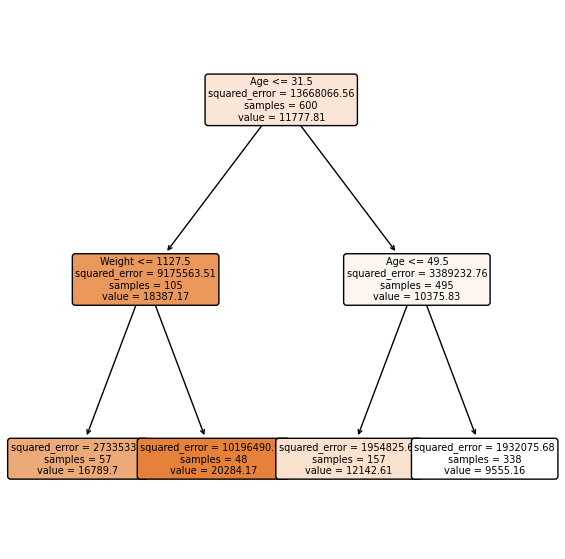

In [35]:
from sklearn.tree import DecisionTreeRegressor

toyota = pd.read_csv('ToyotaCorolla_refined.csv')
toyota = toyota.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyota[predictors], drop_first=True)
y = toyota[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

tree_regress = DecisionTreeRegressor(random_state=1, max_depth=2, min_impurity_decrease=0.05)
tree_regress.fit(train_X, train_y)
tree_regress = fulltree_regress
plt.figure(figsize=(7,7))
plot_tree(fulltree_regress,
          feature_names=train_X.columns,
          filled=True,
          fontsize=7,  # Larger font size
          proportion=False,
          rounded=True,  # Rounded corners for nodes
          precision=2)  # Less precision in numerical outputs to save space
plt.show()

In [ ]:
# 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_regress, train_X, train_y, cv=5)
print("Accuracy scores of each fold:", [f'{acc:0.3f}' for acc in scores])
print("Average accuracy score:", np.mean(scores))

Accuracy scores of each fold: ['0.767', '0.689', '0.767', '0.825', '0.778']
Average accuracy score: 0.7649465050890971


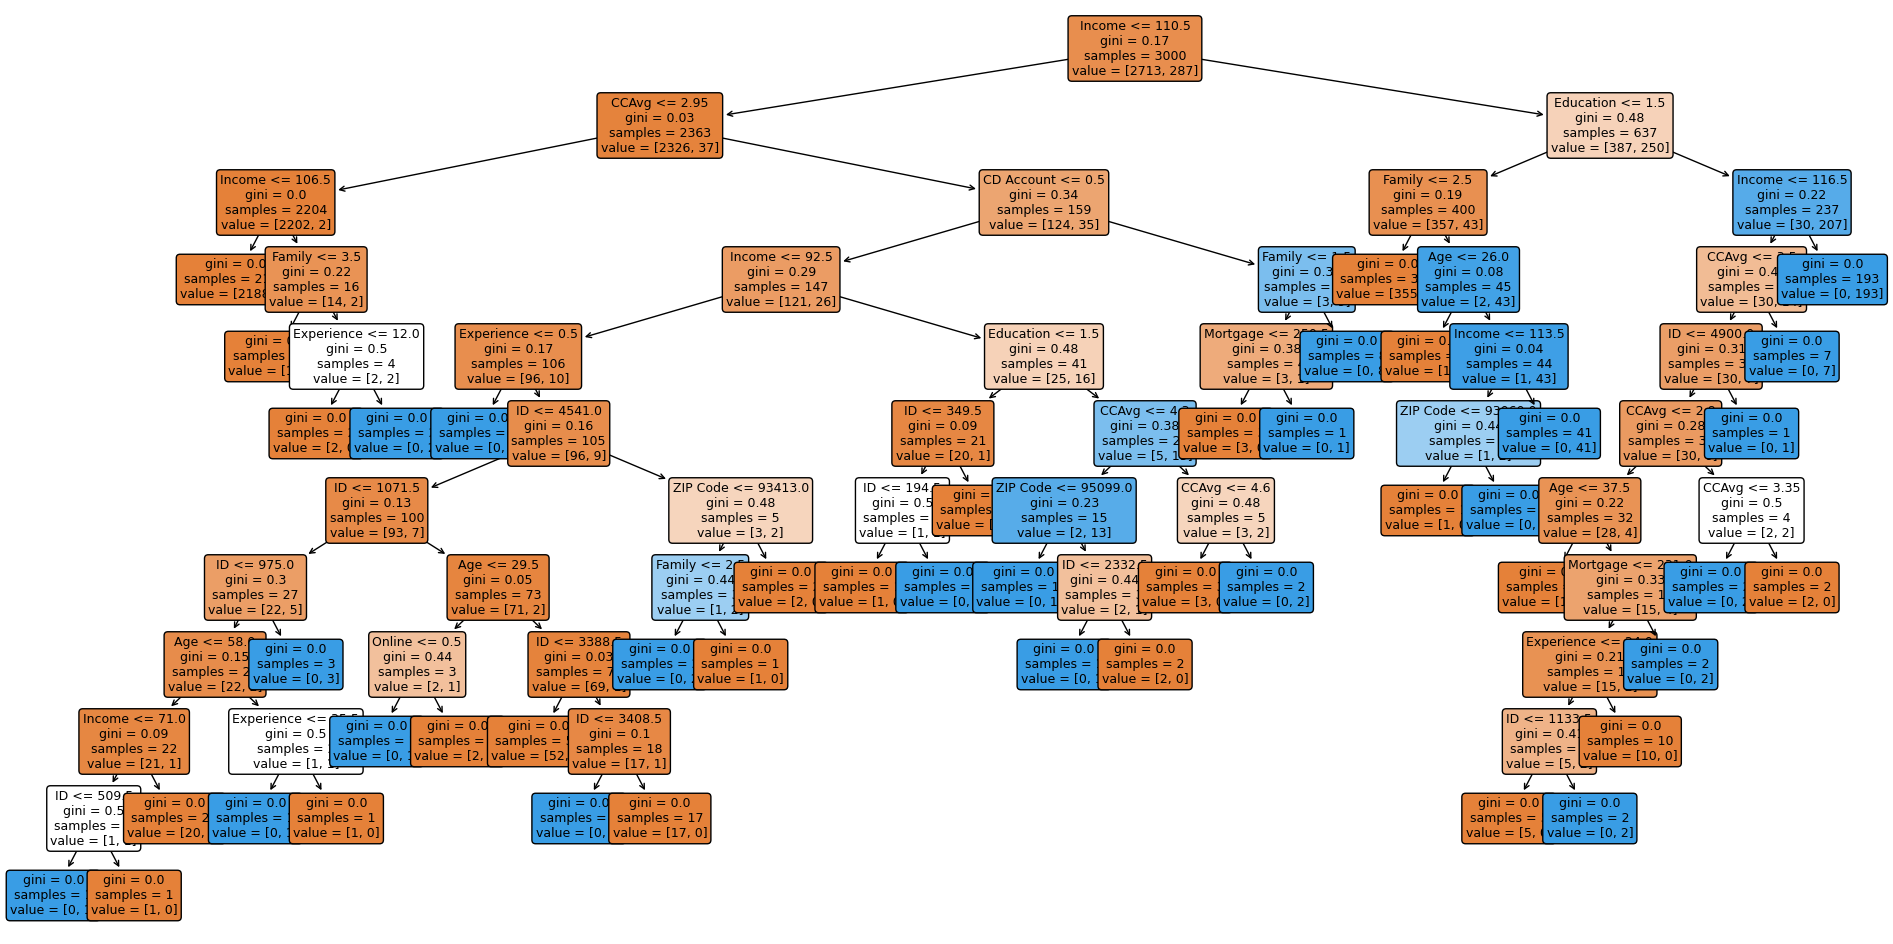

In [36]:
# Grid Search
X = df2.drop(columns=['Personal Loan'])
Y = df2['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)

fulltree = DecisionTreeClassifier(random_state=1)
fulltree.fit(train_X, train_y)

plt.figure(figsize=(24,12))
plot_tree(fulltree,
          feature_names=train_X.columns,
          filled=True,
          fontsize=9,  # Larger font size
          proportion=False,
          rounded=True,  # Rounded corners for nodes
          precision=2)  # Less precision in numerical outputs to save space
plt.show()

In [37]:
valid_preds = fulltree.predict(valid_X)

valid_conf_matrix = confusion_matrix(valid_y, valid_preds)
valid_conf_df = pd.DataFrame(valid_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Validation Confusion Matrix:\n", valid_conf_df)

valid_accuracy = accuracy_score(valid_y, valid_preds)
print("validation Accuracy:", valid_accuracy)

Validation Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                1791                  16
Actual Positive                  27                 166
validation Accuracy: 0.9785


In [38]:
#1st round
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)
gridSearch.fit(train_X, train_y)

print('Initial score:', gridSearch.best_score_)
print('Initial parameters:', gridSearch.best_params_)

Initial score: 0.9866666666666667
Initial parameters: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [39]:
#2nd round
param_grid = {
    'max_depth': list(range(5, 15)),
    'min_samples_split': list(range(15, 25)),
    'min_impurity_decrease': np.arange(0.0001, 0.0005, 0.001)
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)
gridSearch.fit(train_X, train_y)

print('Improved score:', gridSearch.best_score_)
print('Improved parameters:', gridSearch.best_params_)

Improved score: 0.9876666666666665
Improved parameters: {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}


In [40]:
#Grid Search로 최적화된 모델 검증
bestclasstree = gridSearch.best_estimator_

valid_preds = bestclasstree.predict(valid_X)

valid_conf_matrix = confusion_matrix(valid_y, valid_preds)
valid_conf_df = pd.DataFrame(valid_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Validation Confusion Matrix:\n", valid_conf_df)

valid_accuracy = accuracy_score(valid_y, valid_preds)
print("validation Accuracy:", valid_accuracy)

Validation Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                1793                  14
Actual Positive                  21                 172
validation Accuracy: 0.9825


In [41]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': list(range(5, 15)),
    'min_samples_split': list(range(15, 25)),
    'min_impurity_decrease': np.arange(0.0001, 0.0005, 0.001)
}

randomgridSearch = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)
randomgridSearch.fit(train_X, train_y)

print('Improved score:', randomgridSearch.best_score_)
print('Improved parameters:', randomgridSearch.best_params_)

Improved score: 0.9876666666666665
Improved parameters: {'min_samples_split': 24, 'min_impurity_decrease': 0.0001, 'max_depth': 9}


In [42]:
#Grid Search로 최적화된 모델 검증
bestclasstree = randomgridSearch.best_estimator_

valid_preds = bestclasstree.predict(valid_X)

valid_conf_matrix = confusion_matrix(valid_y, valid_preds)
valid_conf_df = pd.DataFrame(valid_conf_matrix,
                             index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"])
print("Validation Confusion Matrix:\n", valid_conf_df)

valid_accuracy = accuracy_score(valid_y, valid_preds)
print("validation Accuracy:", valid_accuracy)

Validation Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                1791                  16
Actual Positive                  21                 172
validation Accuracy: 0.9815
